# SUP ML 2 - MODEL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
pip install catboost

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import sklearn.metrics as metrics
import joblib
import pickle

# Sklearn for models FOR CLASSIFICATION
from sklearn.svm import SVC
from sklearn. linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

# Sklearn for Hyper parametrization
from sklearn.model_selection import GridSearchCV

import time
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
import shap

# Removing alerts
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Carga clean data

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Master_Data_Science/DSC0324BCN-ENTREGABLE_2-Barria_Bau_Guimerà_Maninatt_Solieri/Clean_Data/traintest_clean')

In [ ]:
df

,mou,totmrc,da,vceovr,roam,change_mou,change_rev,drop_vce,blck_vce,unan_vce,recv_vce,custcare,ccrndmou,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,mou_peav,opk_vce,mou_opkv,drop_blk,complete,callwait,churn,months,uniqsubs,actvsubs,crclscod,adjrev,adjmou,avgrev,avgmou,avgqty,avg3qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH,area_CALIFORNIA NORTH,area_CENTRAL/SOUTH TEXAS,area_CHICAGO,area_DALLAS,area_DC/MARYLAND/VIRGINIA,area_GREAT LAKES,area_HOUSTON,area_LOS ANGELES,area_MIDWEST,area_NEW ENGLAND,area_NEW YORK CITY,area_NORTH FLORIDA,area_NORTHWEST/ROCKY MOUNTAIN,area_OHIO,area_PHILADELPHIA,area_SOUTH FLORIDA,area_SOUTHWEST,area_TENNESSEE,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z
0,219.25,22.50,0.2475,0.0,0.0000,-157.25,-18.9975,0.666667,0.666667,6.333333,42.333333,0.000000,0.000000,90.643333,97.176667,0.000000,0.000000,0.000000,0.000000,132.600000,24.000000,55.220000,1.333333,45.000000,0.333333,1,61,2,1,0.0,1453.44,4085.00,29.66,83.37,32.69,116,38.0,149.98999,2.0,2.0,15.0,1.0,4.0,3.0,1,361.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,10.25,16.99,0.0000,0.0,0.0000,-4.25,0.0000,0.333333,0.000000,2.666667,0.333333,0.000000,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,5.193333,1.000000,0.233333,0.333333,6.000000,0.000000,1,58,1,1,2.0,1934.47,24303.05,34.54,433.98,140.86,7,17.0,29.98999,2.0,1.0,7.0,2.0,5.0,2.0,1,1504.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7.50,38.00,0.0000,0.0,0.0000,-1.50,0.0000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,8.410000,0.413333,0.333333,0.256667,0.000000,0.000000,3.380000,3.666667,5.450000,0.000000,3.666667,0.000000,0,60,1,1,1.0,1941.81,3035.00,40.45,63.23,30.81,3,40.0,29.98999,1.0,1.0,6.0,4.0,6.0,1.0,1,1812.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,570.50,71.98,0.0000,0.0,0.0000,38.50,0.0000,9.666667,0.666667,77.000000,94.666667,8.666667,15.000000,285.233333,106.330000,14.666667,10.816667,0.666667,0.366667,173.476667,90.333333,218.086667,10.333333,137.000000,0.000000,0,57,1,1,0.0,2166.48,13965.00,38.69,249.38,79.50,191,80.0,149.98999,6.0,4.0,5.0,1.0,6.0,1.0,1,434.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1312.25,75.00,1.2375,0.0,0.0000,156.75,8.1450,52.000000,7.666667,76.000000,365.000000,4.333333,11.000000,369.536667,200.320000,370.333333,243.213333,147.000000,85.146667,382.096667,303.666667,187.760000,59.666667,577.333333,22.666667,0,59,2,2,2.0,3932.90,40295.00,83.68,857.34,560.89,960,78.0,129.98999,9.0,4.0,1.0,1.0,6.0,1.0,1,458.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85920,140.00,10.00,0.2475,11.7,0.0000,123.00,-4.9575,1.000000,1.333333,4.666667,4.666667,0.000000,0.000000,19.100000,10.856667,4.666667,3.126667,2.000000,8.566667,16.950000,10.333333,13.006667,2.333333,18.333333,0.333333,1,11,2,2,0.0,197.32,1092.00,19.73,109.20,41.40,40,17.0,79.98999,2.0,1.0,1.0,4.0,7.0,2.0,1,314.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
85921,936.25,79.99,0.0000,52.7,2.5800

# Split X-y

In [ ]:
target = 'churn'

In [ ]:
y = df[target]
X = df.drop(target,axis=1)

In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
85920    1
85921    0
85922    0
85923    1
85924    0
Name: churn, Length: 85925, dtype: int64

In [ ]:
X

,mou,totmrc,da,vceovr,roam,change_mou,change_rev,drop_vce,blck_vce,unan_vce,recv_vce,custcare,ccrndmou,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,mou_peav,opk_vce,mou_opkv,drop_blk,complete,callwait,months,uniqsubs,actvsubs,crclscod,adjrev,adjmou,avgrev,avgmou,avgqty,avg3qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH,area_CALIFORNIA NORTH,area_CENTRAL/SOUTH TEXAS,area_CHICAGO,area_DALLAS,area_DC/MARYLAND/VIRGINIA,area_GREAT LAKES,area_HOUSTON,area_LOS ANGELES,area_MIDWEST,area_NEW ENGLAND,area_NEW YORK CITY,area_NORTH FLORIDA,area_NORTHWEST/ROCKY MOUNTAIN,area_OHIO,area_PHILADELPHIA,area_SOUTH FLORIDA,area_SOUTHWEST,area_TENNESSEE,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z
0,219.25,22.50,0.2475,0.0,0.0000,-157.25,-18.9975,0.666667,0.666667,6.333333,42.333333,0.000000,0.000000,90.643333,97.176667,0.000000,0.000000,0.000000,0.000000,132.600000,24.000000,55.220000,1.333333,45.000000,0.333333,61,2,1,0.0,1453.44,4085.00,29.66,83.37,32.69,116,38.0,149.98999,2.0,2.0,15.0,1.0,4.0,3.0,1,361.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,10.25,16.99,0.0000,0.0,0.0000,-4.25,0.0000,0.333333,0.000000,2.666667,0.333333,0.000000,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,5.193333,1.000000,0.233333,0.333333,6.000000,0.000000,58,1,1,2.0,1934.47,24303.05,34.54,433.98,140.86,7,17.0,29.98999,2.0,1.0,7.0,2.0,5.0,2.0,1,1504.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7.50,38.00,0.0000,0.0,0.0000,-1.50,0.0000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,8.410000,0.413333,0.333333,0.256667,0.000000,0.000000,3.380000,3.666667,5.450000,0.000000,3.666667,0.000000,60,1,1,1.0,1941.81,3035.00,40.45,63.23,30.81,3,40.0,29.98999,1.0,1.0,6.0,4.0,6.0,1.0,1,1812.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,570.50,71.98,0.0000,0.0,0.0000,38.50,0.0000,9.666667,0.666667,77.000000,94.666667,8.666667,15.000000,285.233333,106.330000,14.666667,10.816667,0.666667,0.366667,173.476667,90.333333,218.086667,10.333333,137.000000,0.000000,57,1,1,0.0,2166.48,13965.00,38.69,249.38,79.50,191,80.0,149.98999,6.0,4.0,5.0,1.0,6.0,1.0,1,434.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1312.25,75.00,1.2375,0.0,0.0000,156.75,8.1450,52.000000,7.666667,76.000000,365.000000,4.333333,11.000000,369.536667,200.320000,370.333333,243.213333,147.000000,85.146667,382.096667,303.666667,187.760000,59.666667,577.333333,22.666667,59,2,2,2.0,3932.90,40295.00,83.68,857.34,560.89,960,78.0,129.98999,9.0,4.0,1.0,1.0,6.0,1.0,1,458.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85920,140.00,10.00,0.2475,11.7,0.0000,123.00,-4.9575,1.000000,1.333333,4.666667,4.666667,0.000000,0.000000,19.100000,10.856667,4.666667,3.126667,2.000000,8.566667,16.950000,10.333333,13.006667,2.333333,18.333333,0.333333,11,2,2,0.0,197.32,1092.00,19.73,109.20,41.40,40,17.0,79.98999,2.0,1.0,1.0,4.0,7.0,2.0,1,314.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
85921,936.25,79.99,0.0000,52.7,2.5800,109.75,-22.5000,11.66

# Distribución del target

In [ ]:
new_distribution = (df[target].value_counts(normalize=True) * 100).round(2)
print(f"La distribucion CHURN: \
      1 = {df[target].value_counts()[0]} ({new_distribution[0]}%)\
        0 = {df[target].value_counts()[1]} ({new_distribution[1]}%)")

La distribucion CHURN:       1 = 42152 (49.06%)        0 = 43773 (50.94%)


# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

In [ ]:
print("En este caso no hace falta porqué el dataset está bien balanceado.")

En este caso no hace falta porqué el dataset está bien balanceado.


# Split TRAIN-TEST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train

,mou,totmrc,da,vceovr,roam,change_mou,change_rev,drop_vce,blck_vce,unan_vce,recv_vce,custcare,ccrndmou,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,mou_peav,opk_vce,mou_opkv,drop_blk,complete,callwait,months,uniqsubs,actvsubs,crclscod,adjrev,adjmou,avgrev,avgmou,avgqty,avg3qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH,area_CALIFORNIA NORTH,area_CENTRAL/SOUTH TEXAS,area_CHICAGO,area_DALLAS,area_DC/MARYLAND/VIRGINIA,area_GREAT LAKES,area_HOUSTON,area_LOS ANGELES,area_MIDWEST,area_NEW ENGLAND,area_NEW YORK CITY,area_NORTH FLORIDA,area_NORTHWEST/ROCKY MOUNTAIN,area_OHIO,area_PHILADELPHIA,area_SOUTH FLORIDA,area_SOUTHWEST,area_TENNESSEE,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z
4760,346.00,34.9900,0.4950,44.5000,0.5850,-346.00,-47.8675,3.333333,1.333333,11.666667,17.000000,0.000000,0.000000,259.606667,109.770000,0.333333,0.066667,5.000000,10.936667,307.773333,21.666667,61.603333,4.666667,92.000000,1.333333,39,2,2,0.0,1734.06,9158.0,46.87,247.51,86.05,130,78.0,29.989990,1.0,1.0,6.0,1.0,4.0,2.0,1,1165.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2926,109.50,29.9900,0.0000,1.4000,0.0000,-31.50,-1.6700,1.333333,1.000000,3.000000,9.333333,0.000000,0.000000,67.903333,30.016667,1.333333,0.600000,0.000000,0.000000,95.440000,3.333333,2.480000,2.333333,35.666667,0.000000,36,2,1,0.0,971.22,3150.0,30.35,98.44,48.81,48,32.0,29.989990,4.0,3.0,3.0,2.0,7.0,1.0,1,684.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
63626,98.75,39.9900,0.2475,0.0000,0.3200,-14.75,1.7025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12,1,1,0.0,302.60,1253.0,30.26,125.30,45.40,43,31.0,149.989990,1.0,1.0,9.0,4.0,5.0,0.0,0,351.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
36763,1687.75,69.9900,0.7425,13.2000,0.7050,267.25,26.5725,16.666667,7.666667,50.333333,181.666667,10.333333,47.000000,978.876667,493.796667,112.333333,278.213333,68.000000,320.030000,408.340000,256.000000,1064.333333,24.666667,298.666667,1.000000,17,1,1,18.0,982.82,14660.0,70.20,1047.14,288.64,374,66.0,149.989990,3.0,2.0,15.0,1.0,7.0,0.0,1,215.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24312,313.00,30.0000,0.4950,18.2875,0.0000,-183.00,-18.7825,6.000000,0.666667,29.666667,10.000000,0.666667,4.000000,245.893333,23.010000,20.333333,17.433333,3.666667,6.636667,75.903333,75.333333,193.000000,6.666667,112.000000,0.000000,26,1,1,0.0,838.39,3710.0,33.54,148.40,53.64,127,43.0,29.989990,1.0,1.0,1.0,2.0,7.0,0.0,0,782.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,400.75,50.0000,0.4950,8.4750,0.0000,-180.75,-9.5750,5.666667,0.333333,29.000000,70.666667,0.666667,3.666667,185.076667,103.636667,49.666667,40.920000,25.666667,40.996667,178.160000,66.333333,110.553333,6.000000,117.000000,1.000000,18,2,2,0.0,2071.99,11145.0,121.88,655.59,189.94,219,62.0,149.989990,3.0,2.0,2.0,1.0,6.0,0.0,1,343.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [ ]:
X_test

,mou,totmrc,da,vceovr,roam,change_mou,change_rev,drop_vce,blck_vce,unan_vce,recv_vce,custcare,ccrndmou,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,mou_peav,opk_vce,mou_opkv,drop_blk,complete,callwait,months,uniqsubs,actvsubs,crclscod,adjrev,adjmou,avgrev,avgmou,avgqty,avg3qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH,area_CALIFORNIA NORTH,area_CENTRAL/SOUTH TEXAS,area_CHICAGO,area_DALLAS,area_DC/MARYLAND/VIRGINIA,area_GREAT LAKES,area_HOUSTON,area_LOS ANGELES,area_MIDWEST,area_NEW ENGLAND,area_NEW YORK CITY,area_NORTH FLORIDA,area_NORTHWEST/ROCKY MOUNTAIN,area_OHIO,area_PHILADELPHIA,area_SOUTH FLORIDA,area_SOUTHWEST,area_TENNESSEE,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z
28734,407.00,30.0000,0.0000,20.8250,0.0000,-91.00,-29.5725,4.000000,0.000000,43.000000,79.333333,0.000000,0.000000,176.193333,134.263333,11.666667,21.033333,16.000000,68.013333,119.183333,57.666667,191.273333,4.000000,71.000000,0.666667,21,1,1,0.0,920.73,7048.0,46.04,352.40,135.65,178,57.0,129.989990,2.0,2.0,8.0,1.0,7.0,0.0,1,99.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
13030,888.00,59.9900,1.7325,43.6500,0.0000,694.00,129.3675,6.666667,11.666667,58.666667,83.333333,1.333333,1.333333,322.780000,186.140000,59.000000,69.633333,10.000000,20.623333,281.220000,136.666667,227.700000,18.333333,217.666667,2.666667,28,2,2,0.0,1696.27,15601.0,65.24,600.04,304.00,298,53.0,29.989990,2.0,2.0,12.0,6.0,5.0,3.0,1,777.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
26248,145.75,29.9900,0.0000,0.0000,0.0975,5.25,0.0225,3.333333,0.000000,19.666667,14.333333,0.000000,0.000000,47.730000,25.673333,0.666667,1.353333,0.000000,0.000000,55.443333,12.666667,17.960000,3.333333,45.000000,0.333333,19,1,1,0.0,658.21,2383.0,36.57,132.39,74.28,69,32.0,29.989990,2.0,2.0,13.0,2.0,9.0,2.0,1,566.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
82490,75.75,10.0000,0.0000,0.0000,0.0000,-42.75,-0.0975,0.000000,0.333333,8.666667,4.666667,0.000000,0.000000,109.416667,22.020000,8.666667,8.093333,2.666667,21.353333,39.233333,13.000000,92.203333,0.333333,19.333333,0.666667,12,4,2,0.0,111.89,1288.0,10.17,117.09,18.45,14,10.0,99.989990,1.0,1.0,15.0,2.0,4.0,0.0,1,357.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24261,59.50,15.0000,0.0000,13.3300,0.0000,11.50,2.8450,0.666667,0.000000,1.666667,0.000000,0.000000,0.000000,35.793333,0.000000,0.000000,0.000000,0.000000,0.000000,4.136667,19.333333,31.656667,0.666667,21.666667,0.000000,22,1,1,0.0,413.55,607.0,19.69,28.90,14.48,25,25.0,9.989998,1.0,1.0,5.0,2.0,6.0,2.0,1,675.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62898,777.75,69.9900,3.4650,47.2500,0.7050,302.25,80.6400,2.666667,6.333333,28.333333,46.000000,0.333333,1.000000,433.443333,226.010000,40.333333,50.000000,15.000000,82.900000,611.023333,19.666667,48.430000,9.000000,139.666667,1.666667,12,3,2,0.0,827.66,5490.0,82.77,549.00,159.10,165,100.0,149.989990,2.0,2.0,2.0,2.0,9.0,1.0,1,218.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,

In [ ]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 68740
Test data instances: 17185


In [ ]:
print("-----Distribucion en % del target en train:")
print((y_train.value_counts() / len(y_train)*100).round(2))
print("-----Distribucion en % del target en test:")
print((y_test.value_counts() / len(y_test)*100).round(2))

-----Distribucion en % del target en train:
churn
1    51.1
0    48.9
Name: count, dtype: float64
-----Distribucion en % del target en test:
churn
1    50.31
0    49.69
Name: count, dtype: float64


# Rescaling

* NO NECESARIO en modelos de Arboles de Decisión.
* Guardar scaler en el model path.

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
# se estandarizan las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)   # estandariza y define la regla de estandarización
X_test_scaled = scaler.transform(X_test_scaled)         # estandariza según la regla definida con el X_train, con la media de X_train
print("Aunque no es necesario para este tipo de modelo (no es un modelo lineal o de distancia), hacemos un scaler para el torneo de modelos.")

Aunque no es necesario para este tipo de modelo (no es un modelo lineal o de distancia), hacemos un scaler para el torneo de modelos.


In [ ]:
model_path = '/content/drive/MyDrive/Master_Data_Science/DSC0324BCN-ENTREGABLE_2-Barria_Bau_Guimerà_Maninatt_Solieri/Scaler/scaler'
joblib.dump(scaler, model_path)
print("Guardamos el scaler")

Guardamos el scaler


In [ ]:
X_train_scaled

array([[-0.29935026, -0.46294252, -0.17042791, ..., -0.38878507,
        -0.35644289,  4.63530986],
       [-0.76378758, -0.67886576, -0.40015377, ..., -0.38878507,
        -0.35644289, -0.21573531],
       [-0.78489836, -0.24701928, -0.28529084, ..., -0.38878507,
        -0.35644289, -0.21573531],
       ...,
       [-0.68376296, -0.67843391, -0.40015377, ..., -0.38878507,
        -0.35644289, -0.21573531],
       [ 0.3202268 , -0.05085301, -0.05556498, ..., -0.38878507,
        -0.35644289, -0.21573531],
       [ 0.40663374,  0.61667368, -0.40015377, ..., -0.38878507,
        -0.35644289, -0.21573531]])

In [ ]:
X_test_scaled

array([[-0.17955881, -0.67843391, -0.40015377, ..., -0.38878507,
        -0.35644289, -0.21573531],
       [ 0.76502618,  0.61667368,  0.40388673, ..., -0.38878507,
        -0.35644289, -0.21573531],
       [-0.69260004, -0.67886576, -0.40015377, ..., -0.38878507,
        -0.35644289, -0.21573531],
       ...,
       [-0.89094325, -0.67843391, -0.40015377, ..., -0.38878507,
        -0.35644289, -0.21573531],
       [-0.27332999, -0.24701928, -0.40015377, ..., -0.38878507,
        -0.35644289, -0.21573531],
       [-0.10640748,  0.56636357, -0.40015377, ..., -0.38878507,
        -0.35644289, -0.21573531]])

# TRAIN-VALIDA

## Torneo de Modelos

* Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

##### Funciones para el torneo

In [ ]:
def medicion(y_t, y_p):
  """imprime la curva ROC y el AUC"""

  # Calcula el fpr y tpr por todos los umbrales de cla clasificacion
  fpr, tpr, threshold = metrics.roc_curve(y_t, y_p)
  roc_auc = metrics.auc(fpr, tpr)

  # para añadir el gráfico
  # method I: plt
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 6))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  return roc_auc

In [ ]:
def entrenar(Xtrain, Xtest, ytrain, ytest):
  """entrena 6 módelos.
      imprime la curva roc de cada módelo junto al valor AUC
      devuelve un dataframe con los valores de AUC redondeados a 5 decimales para cada módelo"""

  # creamos la lista de auc vacía
  lista_aucs = []

  # Support Vector Machine
  print('Support Vector Machine')
  svclassifier = SVC(max_iter=20)

  svclassifier.fit(Xtrain, ytrain)
  y_pred = svclassifier.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('SVC', round(roc_auc, 5)))

  # Regresión logística
  print('Regresión logística')
  lr = LogisticRegression(max_iter=40)

  lr.fit(Xtrain, ytrain)
  y_pred = lr.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('regresión logística', round(roc_auc, 5)))

  # RidgeClassifier
  print('RidgeClassifier')
  rc = RidgeClassifier(max_iter=40)

  rc.fit(Xtrain, ytrain)
  y_pred = rc.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('RidgeClassifier', round(roc_auc, 5)))

  # Decision tree classifier
  print('Decision tree classifier')
  dt_base = DecisionTreeClassifier()

  dt_base.fit(Xtrain, ytrain)
  y_pred_proba = dt_base.predict_proba(Xtest)[:,1]

  roc_auc = medicion(ytest, y_pred_proba)
  lista_aucs.append(('decision tree classifier', round(roc_auc, 5)))

  # Random forest
  print('Random forest')
  rf_base = RandomForestClassifier()

  rf_base.fit(Xtrain, ytrain)
  y_pred_proba = rf_base.predict_proba(Xtest)[:,1]

  roc_auc = medicion(ytest, y_pred_proba)
  lista_aucs.append(('random forest', round(roc_auc, 5)))

  # Gradient boosting
  print('Gradient boosting')
  gbc_base = GradientBoostingClassifier()

  gbc_base.fit(Xtrain, ytrain)
  y_pred_proba = gbc_base.predict_proba(Xtest)[:,1]

  roc_auc = medicion(ytest, y_pred_proba)
  lista_aucs.append(('gradient boosting', round(roc_auc, 5)))

  # XGBClassifier
  print('XGBClassifier')
  xgbc_base = XGBClassifier()

  xgbc_base.fit(Xtrain, ytrain)
  y_pred_proba = xgbc_base.predict_proba(Xtest)[:,1]

  roc_auc = medicion(ytest, y_pred_proba)
  lista_aucs.append(('XGB classifier', round(roc_auc, 5)))

  # CatBoostClassifier
  print('CatBoostClassifier')
  cat_base = CatBoostClassifier(verbose=False)

  cat_base.fit(Xtrain, ytrain)
  y_pred_proba = cat_base.predict_proba(Xtest)[:,1]

  roc_auc = medicion(ytest, y_pred_proba)
  lista_aucs.append(('CatBoost Classifier', round(roc_auc, 5)))

  df_aucs = pd.DataFrame(lista_aucs, columns=['modelos', 'AUC'])
  df_aucs = df_aucs.set_index('modelos')

  return df_aucs

##### Torneo

Support Vector Machine


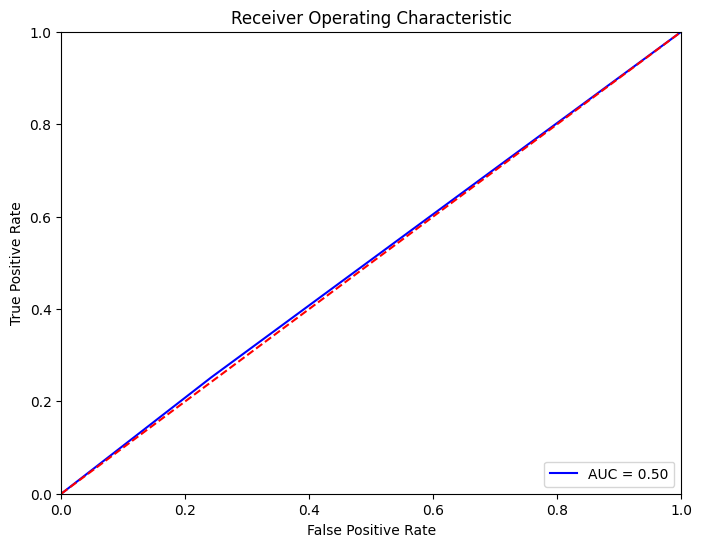

Regresión logística


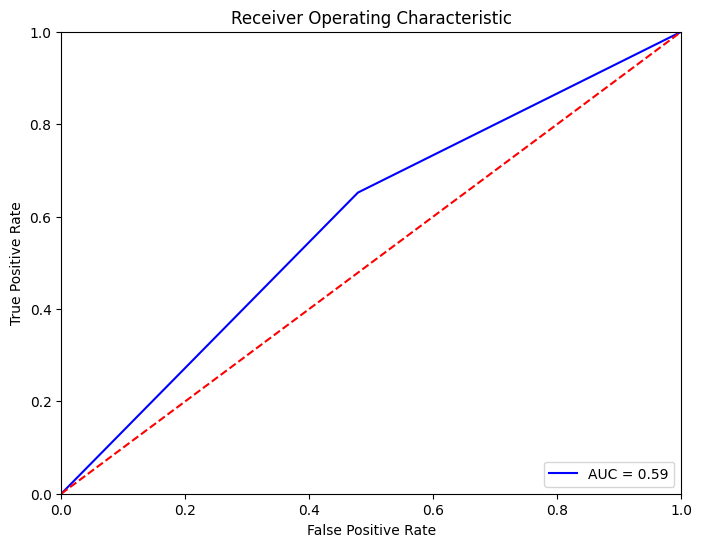

RidgeClassifier


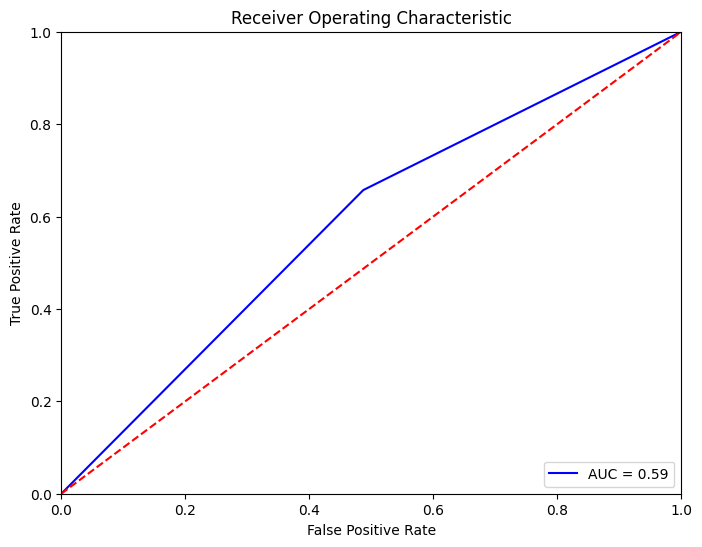

Decision tree classifier


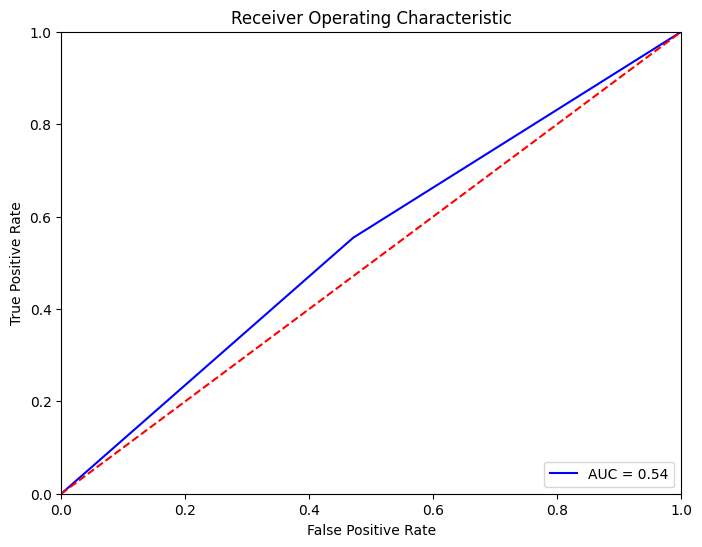

Random forest


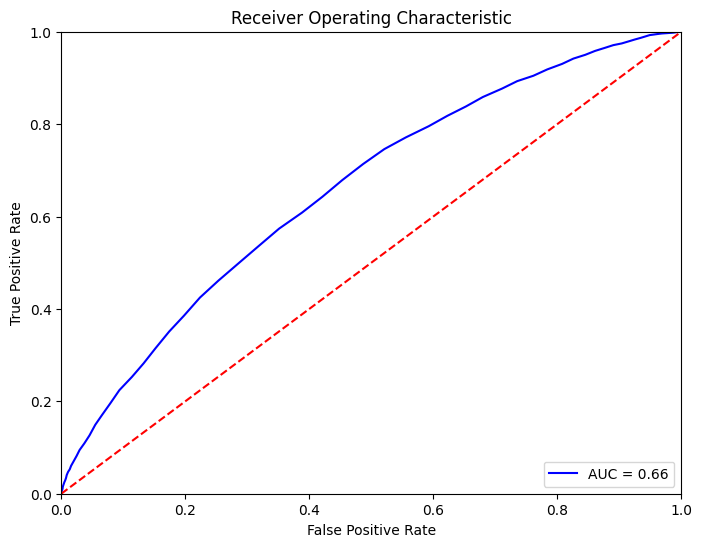

Gradient boosting


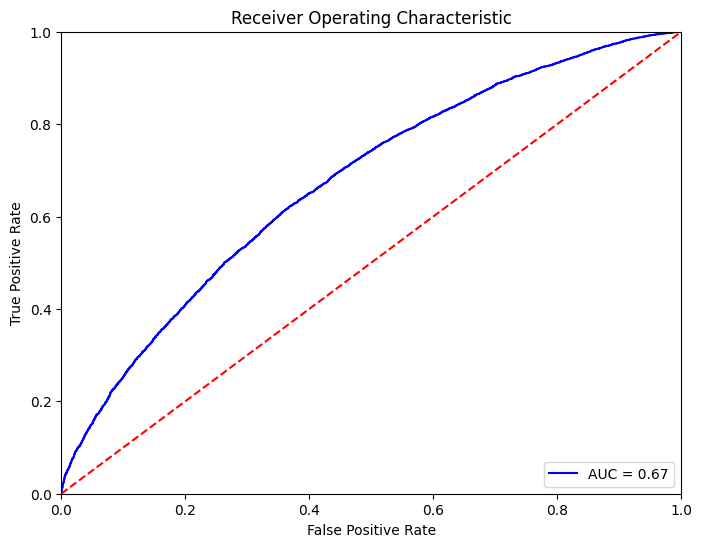

XGBClassifier


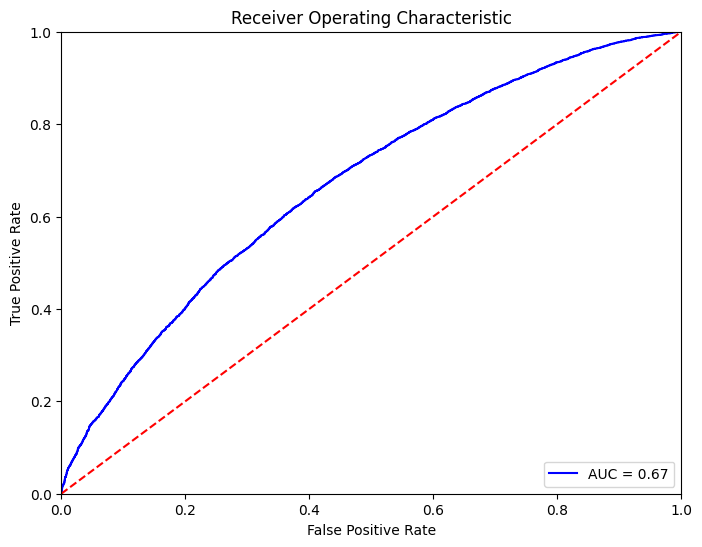

CatBoostClassifier


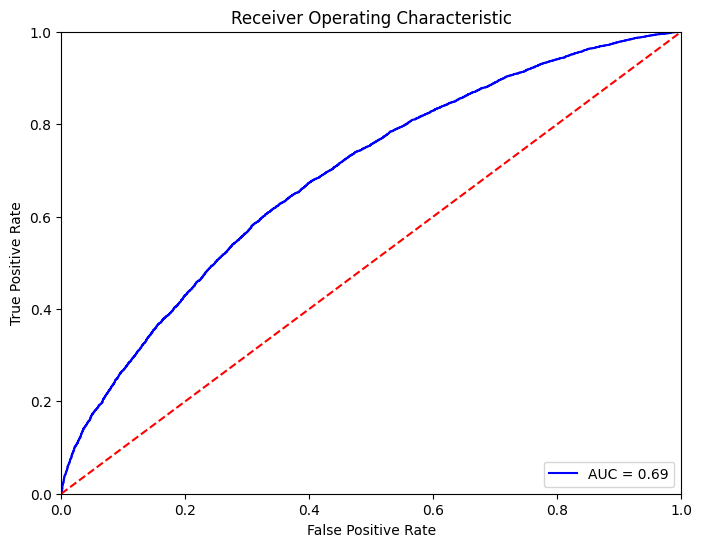

In [ ]:
aucs_scaled = entrenar(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
aucs_scaled.sort_values(by='AUC',ascending=False)

,AUC
modelos,
CatBoost Classifier,0.68748
gradient boosting,0.67424
XGB classifier,0.66909
random forest,0.65879
regresión logística,0.58668
RidgeClassifier,0.58506
decision tree classifier,0.54162
SVC,0.50498


In [ ]:
print("""
El mejor modelo ha sido el Catboost (que no necesita escalarizacion),
      por lo que  entrenaremos con datos sin escalar, también para poder plotear el shaply""")


El mejor modelo ha sido el Catboost (que no necesita escalarizacion),
      por lo que  entrenaremos con datos sin escalar, también para poder plotear el shaply


## Hiperparametrizacion

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [ ]:
model = CatBoostClassifier(verbose=0)

# Especificar el espacio de hiperparámetros
param_dist = {
    'iterations': np.arange(50, 500, 50),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'depth': np.arange(3, 10, 1),
    'l2_leaf_reg': np.arange(1, 10, 1),
    'border_count': np.arange(30, 100, 10)
}

# Configurar RandomSearch
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, scoring='roc_auc', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Ejecutar la búsqueda
random_search.fit(X_train, y_train)

# Evaluar el mejor modelo
best_model = random_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f'Mejor hiperparámetros: {random_search.best_params_}')
print(f'AUC en dataset de test: {auc}')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mejor hiperparámetros: {'learning_rate': 0.06999999999999999, 'l2_leaf_reg': 6, 'iterations': 300, 'depth': 7, 'border_count': 80}
AUC en el conjunto de prueba: 0.5311665351044615


In [ ]:
# best_params = {
#     'learning_rate': 0.06,
#     'l2_leaf_reg': 5,
#     'iterations': 350,
#     'depth': 8,
#     'border_count': 60,
#     'verbose': 0
# }

## Modelo final

* Entrenar el modelo final con el algoritmo y los parametros que han funcionado mejor en anteriores experimentos.
* Argumentar la elección.
* Guardar el modelo en model path.

In [ ]:
print("""Debido a que el modelo no parece mejorar su AUC con la hiperparametrizacion recomendada por RandomSearch, decidimos continuar
      con los parametros por defecto de Catboost""")

Debido a que el modelo no parece mejorar su AUC con la hiperparametrizacion recomendada por RandomSearch, decidimos continuar
      con los parametros por defecto de Catboost


In [ ]:
cboost_final = CatBoostClassifier(verbose=False)

In [ ]:
cboost_final.fit(X_train, y_train)

In [ ]:
joblib.dump(cboost_final, '/content/drive/MyDrive/Master_Data_Science/DSC0324BCN-ENTREGABLE_2-Barria_Bau_Guimerà_Maninatt_Solieri/Modelo/cbc_model')
print("Guardamos el modelo")

Guardamos el modelo


# TEST

* Evaluación de las métricas de performance en TEST.

In [ ]:
cboost_final.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
y_pred_proba = cboost_final.predict_proba(X_test)[:,1]

In [ ]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC en el dataset de test: {round(auc,5)}')

AUC en el dataset de test: 0.68978


In [ ]:
X_show = X_test.copy()
X_show["target_real"] = y_test
X_show["prediccion"] = cboost_final.predict(X_test)
X_show["prediccion_proba"] = y_pred_proba
pd.set_option('display.max_columns',10)
X_show.head(10)

,mou,totmrc,da,vceovr,roam,...,ethnic_U,ethnic_Z,target_real,prediccion,prediccion_proba
28734,407.00,30.0000,0.0000,20.825,0.0000,...,0,0,0,0,0.348141
13030,888.00,59.9900,1.7325,43.650,0.0000,...,0,0,1,1,0.721332
26248,145.75,29.9900,0.0000,0.000,0.0975,...,0,0,1,1,0.500404
82490,75.75,10.0000,0.0000,0.000,0.0000,...,0,0,1,0,0.422247
24261,59.50,15.0000,0.0000,13.330,0.0000,...,0,0,0,0,0.483283
60408,240.25,79.8275,0.7425,0.000,21.7275,...,0,0,0,1,0.700745
39514,113.50,32.4900,0.0000,0.000,1.6925,...,1,0,1,1,0.594151
76292,59.00,10.0000,0.0000,0.000,0.5500,...,0,0,1,1,0.724801
64581,1490.75,159.9900,6.4350,0.000,0.1950,...,0,0,1,1,0.607255
795,1864.25,104.9800,1.7325,43.950,0.0000,...,0,0,1,0,0.415277


In [ ]:
y_train_pred = cboost_final.predict(X_train)  # predicciones del modelo en los datos de TRAIN
y_test_pred = cboost_final.predict(X_test)    # predicciones del modelo en los datos de TEST

In [ ]:
y_train_pred_proba = cboost_final.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = cboost_final.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST

In [ ]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)         # AUC en TEST

In [ ]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.8074
AUC Test: 0.6898


In [ ]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

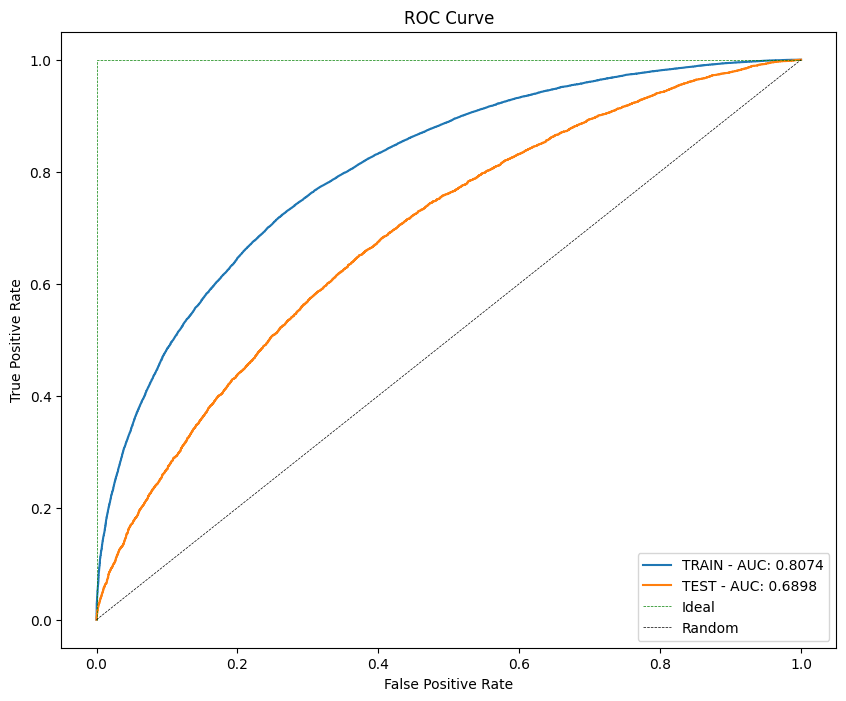

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)

Creamos la matriz de confusion para evaluar mejor nuestro modelo


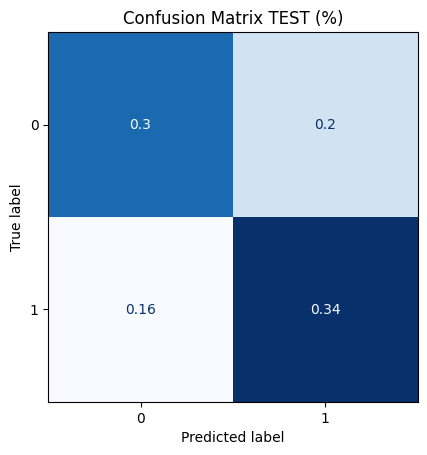

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()
print("Creamos la matriz de confusion para evaluar mejor nuestro modelo")

In [ ]:
print("""
Podemos observar que nuestro modelo tiene los porcentajes mas altos en los campos de
      True positive (arriba a la izq) y True negative (abajo a la derecha)""")


Podemos observar que nuestro modelo tiene los porcentajes mas altos en los campos de
      True positive (arriba a la izq) y True negative (abajo a la derecha)


##### Accuracy, Precision, Recall y F1-Score

In [ ]:
print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.6375
Precision: 0.6311
Recall: 0.6727
F1-score: 0.6513


# INTERPRETABILITY

* Analizamos top features del modelo y su peso en el modelo.
* Plotear SHAP values y el impacto positivo/negativo.
* Comentar las top5 features, su impacto en el target y extraer insights.
* Analisis complementarios:
  * Modelos de arboles: Feature Importances, plot de arbol de decision.
  * Modelos lineales: Coeficentes y formula del modelo.

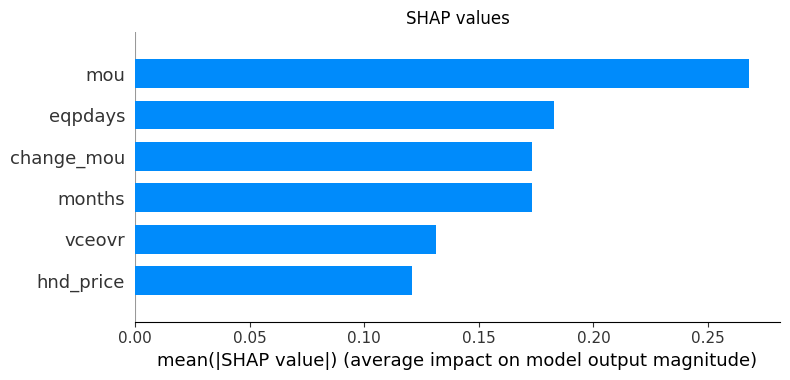

In [ ]:
explainer = shap.TreeExplainer(cboost_final)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=6)

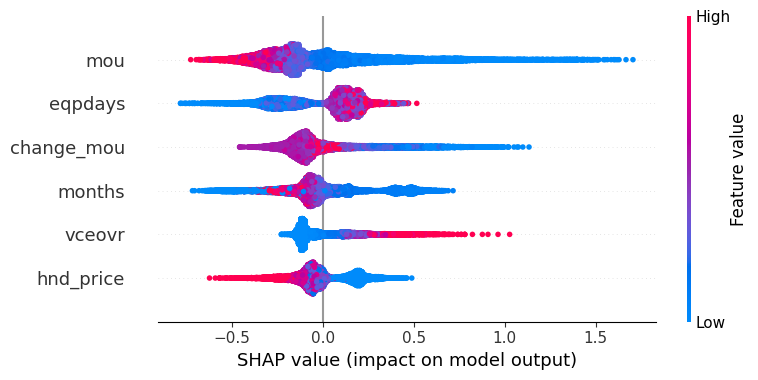

In [ ]:
shap.summary_plot(shap_values, X_test,max_display=6)

**Análisis de las Gráficas de Valores SHAP:**

---



1- Top Features según SHAP Values

El primer gráfico muestra las características ordenadas por su valor de SHAP, que indica su importancia en el modelo. Las cinco características principales son:


+ **eqpdays**: Días desde que se adquirió el equipo.
+ **months**: Meses desde que se inició el contrato.
+ **change_mou**: Cambio en la media de uso de minutos mensuales.
+ **mou**:Media de minutos de uso mensuales
+ **hnd_price**: Precio del equipo actual.

---




2- Impacto de las Características en el Target
El segundo gráfico muestra los valores SHAP para cada característica, indicando si afectan positiva o negativamente al target(Churn).

**eqpdays:**

+ **Impacto:** Valores más altos de eqpdays tienden a tener un impacto negativo en el target.

+ **Insight:** Clientes con equipos más antiguos pueden ser más propensos a cambiar de proveedor (churn).

**months:**

+ **Impacto:** Más meses con el servicio tienden a tener un impacto positivo en el target.

+ **Insight:** La lealtad del cliente se refleja en la duración de la relación con la compañía, cuanto más tiempo lleve el cliente en la empresa, menos probabilidades hay de que se vaya.

**change_mou:**

+ **Impacto:** Cambios significativos en el uso de minutos pueden tener un impacto tanto positivo como negativo en el target.

+ **Insight:** Fluctuaciones en el uso de minutos pueden indicar cambios en el comportamiento del cliente, lo que implican que si el cliente tiende a aumentar los minutos de uso, aumenta también su satisfacción y se reduce la probabilidad de "churn". La acción es inversa para aquellos clientes que disminuyen la cantidad de minnutos de uso.

**mou:**

+ **Impacto:** Valores altos de mou tienen un impacto positivo en el target.

+ **Insight:** Clientes que utilizan más minutos en promedio mensual tienden a contribuir positivamente en el modelo indicando que cuanto mayor sea el parámetro, menor probabilidad hay de que el cliente deje de usar los servicios de la compañía

**hnd_price:**

+ **Impacto:** Un mayor precio del equipo tiene un impacto positivo en el target.

+ **Isight:** Los clientes que compran o tienen equipos más caros, suelen ser más propensos a quedarse en la compañía.

---




**Conclusión de los Insights**

Gracias al análisis anterior somos capaces de ver que las dos primeras variables mencionadas son las que más peso tenen en el modelo (eqpdays y months). A la vez, creemos que una campaña de marketing relacionando ambos aspectos sería conveniente para retener al mayor número de clientes.

Por ejemplo: Lanzar una campaña promocionando un nuevo dispositivo a aquellos clientes que tengan un "eqpdays" alto y a los que lleven poco tiempo en la compañía (un "months" bajo).

De esta forma también añades valor a los clientes en una variable de peso en el modelo que es "hnd_price".

Otras campañas de marketing se podrían realizar incentivando el uso de los dispositivos ya que las otras dos variables que más peso tienen están relacionadas con el uso que le dan los clientes a los servicios actuales, y cuanto más uso podemos visualizar que aumenta la fidelidad.